In [178]:
import bs4
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
import re

In [179]:
df1 = pd.read_excel('vehicle (국산통합).xlsx', engine = 'openpyxl')

In [180]:
df1.tail(40)

,Unnamed: 0,CurbWeight,TopSpeed,Displacement,Power,Torque,vehicle,laptime,Price,Zero
280,281.0,1485,250.0,2.3,260,380,Mazda MAZDASPEED3 (Mazda3 MPS),519.0,NaN,6.1
281,282.0,1580,260.0,3.8,350,400,Hyundai Genesis Coupe 3.8L,523.0,NaN,5.9
282,283.0,1295,235.0,2.0,200,280,Volkswagen Scirocco 2.0 TSI,527.0,NaN,5.8
283,284.0,1319,235.0,2.0,200,269,Honda Civic Type-R 2.0i LS,527.0,26400,5.5
284,285.0,1203,223.0,1.6,194,230,Opel Corsa OPC,528.0,NaN,6.8
285,286.0,1372,235.0,2.0,200,280,Volkswagen Golf GTI (Mk5),533.0,NaN,7.9
286,287.0,1293,230.0,1.6,207,280,Opel Corsa 1.6 Turbo OPC,534.0,NaN,6.8
287,288.0,2589,225.0,5.0,517,625,Range Rover Sport Supercharged (2010),535.0,NaN,5.9
288,NaN,1705,NaN,3.3,375,510,G70 3.3 터보가솔린,NaN,NaN,NaN
289,NaN,1810,NaN,3.3,375,510,스팅어 3.3 터보가솔린,NaN,NaN,NaN


In [181]:
df = df1.iloc[0:288]
df

,Unnamed: 0,CurbWeight,TopSpeed,Displacement,Power,Torque,vehicle,laptime,Price,Zero
0,1.0,1626,325.0,4.0,730,800,AMG GT Black Series,403.62,337800,3.1
1,2.0,1525,354.0,6.5,770,720,Lamborghini Aventador SVJ,404.97,432300,2.8
2,3.0,650,290.0,2.8,455,380,Radical SR8LM,408.00,NaN,3.3
3,4.0,1526,328.0,5.2,640,600,Lamborghini Huracán Performante,412.01,NaN,2.8
4,5.0,650,270.0,2.6,363,271,Radical SR8,415.00,NaN,2.7
...,...,...,...,...,...,...,...,...,...,...
283,284.0,1319,235.0,2.0,200,269,Honda Civic Type-R 2.0i LS,527.00,26400,5.5
284,285.0,1203,223.0,1.6,194,230,Opel Corsa OPC,528.00,NaN,6.8
285,286.0,1372,235.0,2.0,200,280,Volkswagen Golf GTI (Mk5),533.00,NaN,7.9
286,287.0,1293,230.0,1.6,207,280,Opel Corsa 1.6 Turbo OPC,534.00,NaN,6.8


In [182]:
df = df.drop("Unnamed: 0", axis = 1)
df

,CurbWeight,TopSpeed,Displacement,Power,Torque,vehicle,laptime,Price,Zero
0,1626,325.0,4.0,730,800,AMG GT Black Series,403.62,337800,3.1
1,1525,354.0,6.5,770,720,Lamborghini Aventador SVJ,404.97,432300,2.8
2,650,290.0,2.8,455,380,Radical SR8LM,408.00,NaN,3.3
3,1526,328.0,5.2,640,600,Lamborghini Huracán Performante,412.01,NaN,2.8
4,650,270.0,2.6,363,271,Radical SR8,415.00,NaN,2.7
...,...,...,...,...,...,...,...,...,...
283,1319,235.0,2.0,200,269,Honda Civic Type-R 2.0i LS,527.00,26400,5.5
284,1203,223.0,1.6,194,230,Opel Corsa OPC,528.00,NaN,6.8
285,1372,235.0,2.0,200,280,Volkswagen Golf GTI (Mk5),533.00,NaN,7.9
286,1293,230.0,1.6,207,280,Opel Corsa 1.6 Turbo OPC,534.00,NaN,6.8


# 시각화

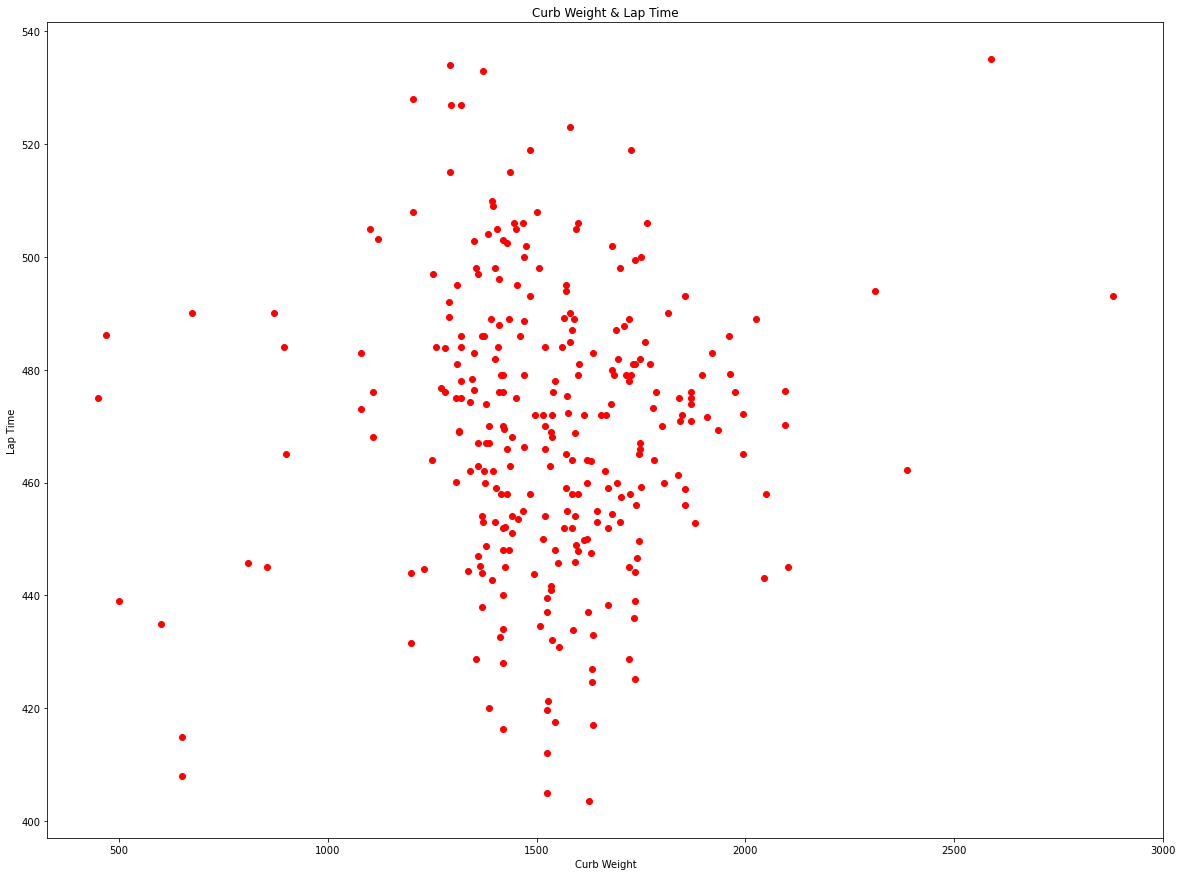

In [185]:
# 차량 무게와 랩 타임의 관계
plt.figure(figsize = (20, 15))
plt.scatter(df['CurbWeight'], df['laptime'], c = 'red')
plt.title("Curb Weight & Lap Time")
plt.xlabel("Curb Weight")
plt.ylabel("Lap Time")
plt.show()

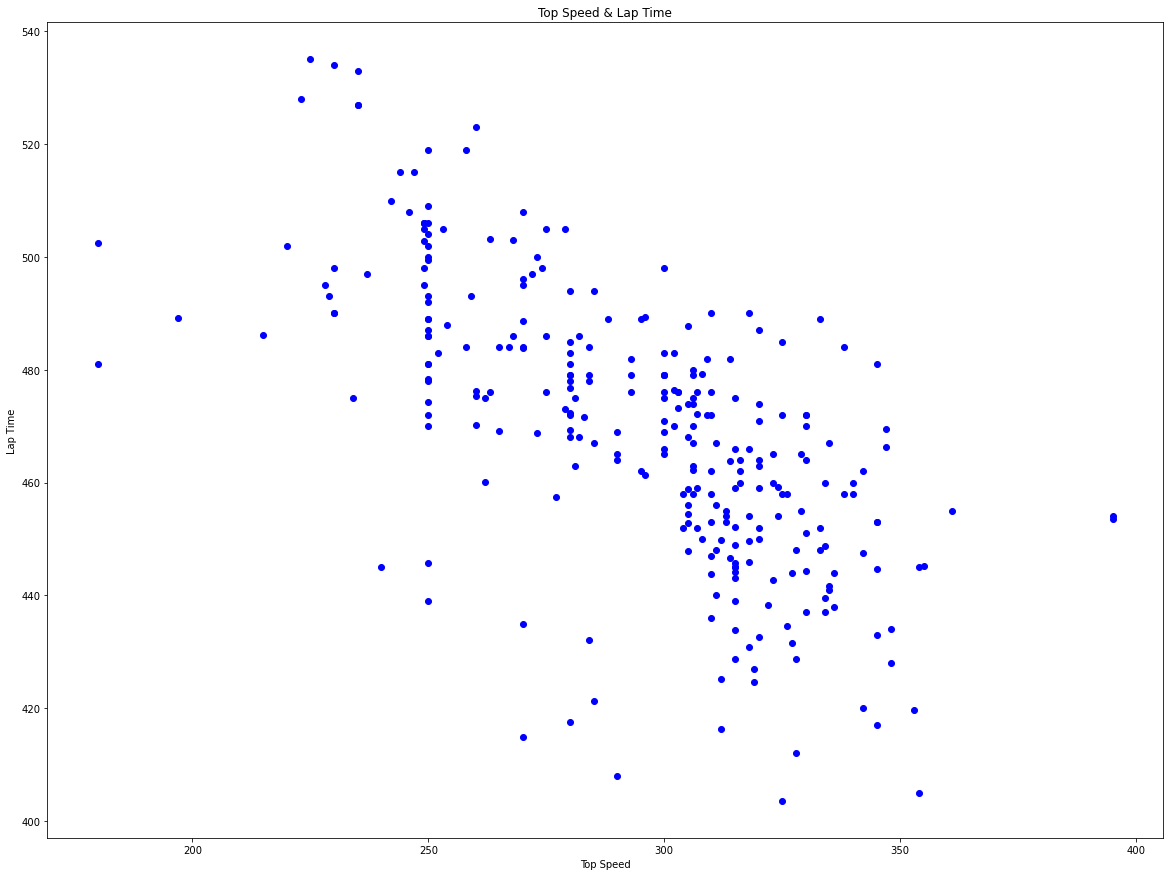

In [186]:
# 최고 속도와 랩 타임의 관계
plt.figure(figsize = (20, 15))
plt.scatter(df['TopSpeed'], df['laptime'], c = 'blue')
plt.title("Top Speed & Lap Time")
plt.xlabel("Top Speed")
plt.ylabel("Lap Time")
plt.show()

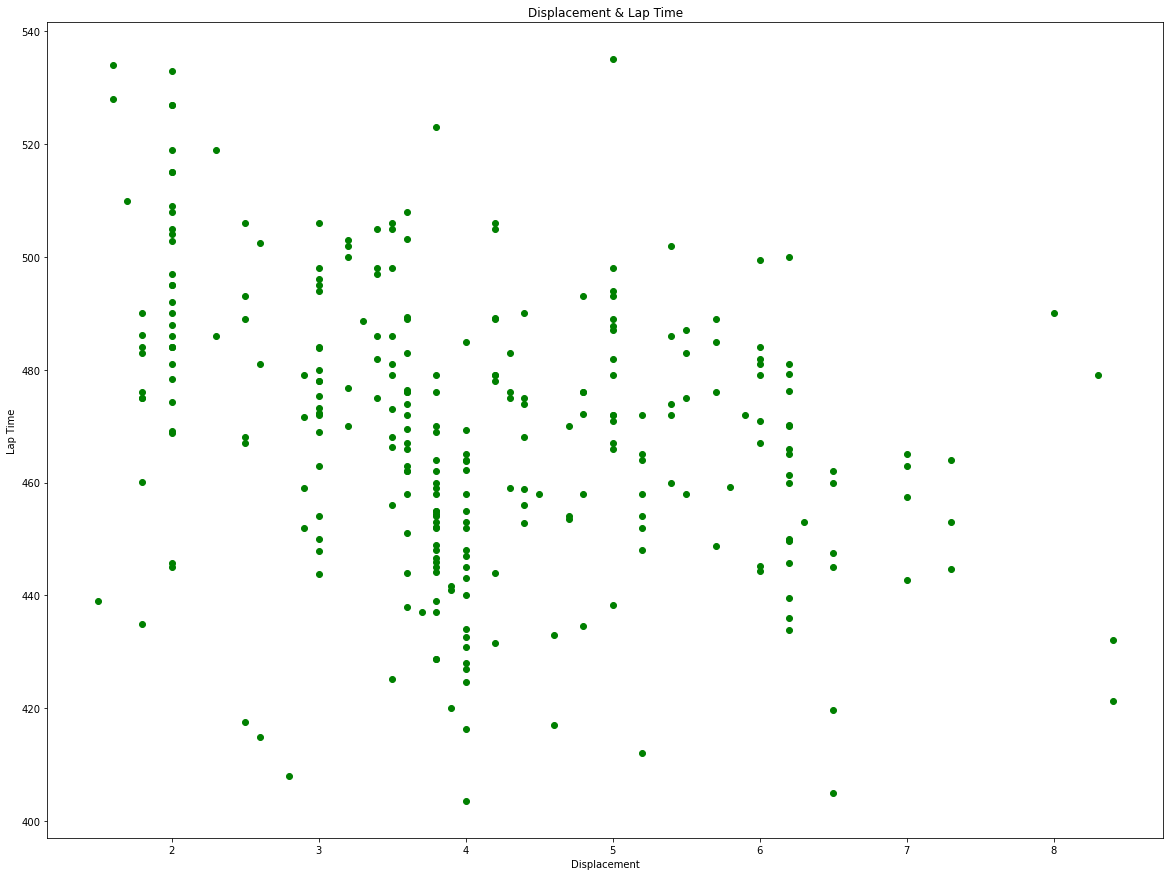

In [187]:
# 배기량와 랩 타임의 관계
plt.figure(figsize = (20, 15))
plt.scatter(df['Displacement'], df['laptime'], c = 'green')
plt.title("Displacement & Lap Time")
plt.xlabel("Displacement")
plt.ylabel("Lap Time")
plt.show()

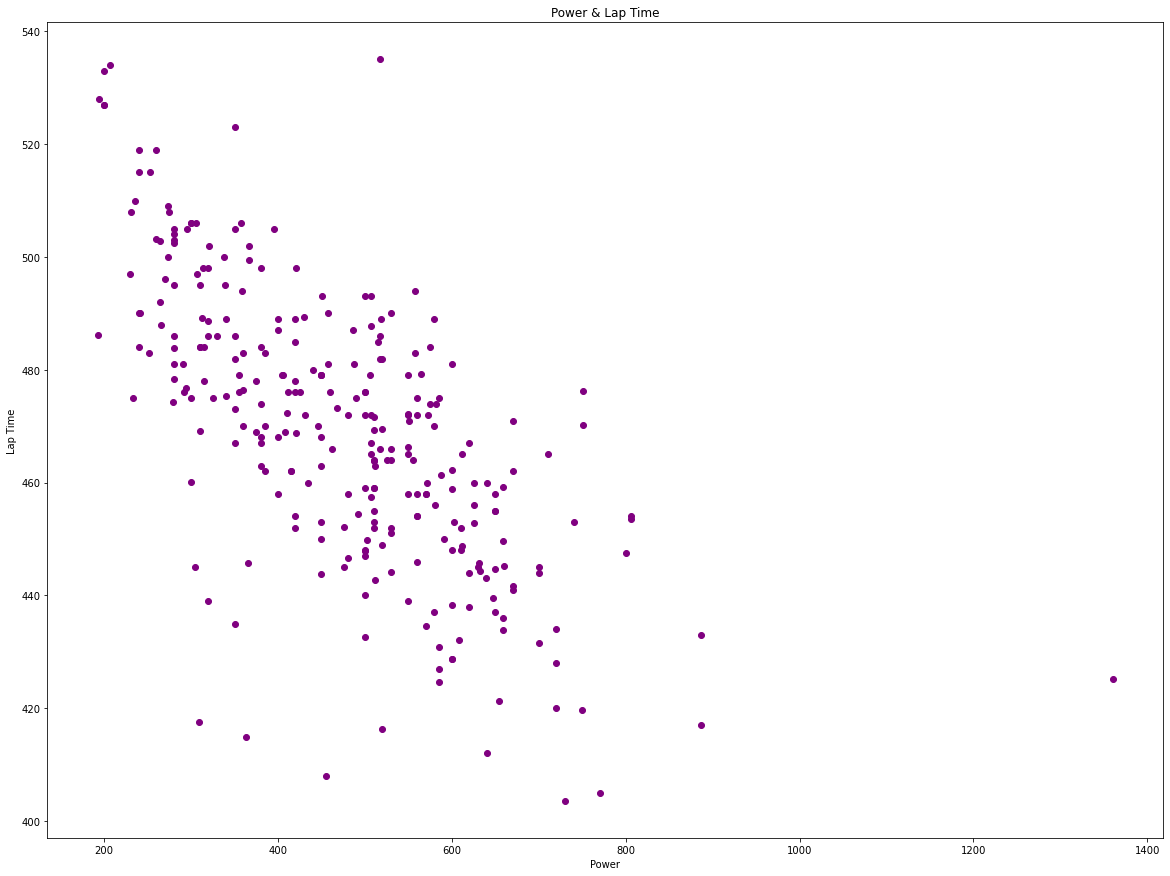

In [188]:
# 마력과 랩 타임의 관계
plt.figure(figsize = (20, 15))
plt.scatter(df['Power'], df['laptime'], c = 'purple')
plt.title("Power & Lap Time")
plt.xlabel("Power")
plt.ylabel("Lap Time")
plt.show()

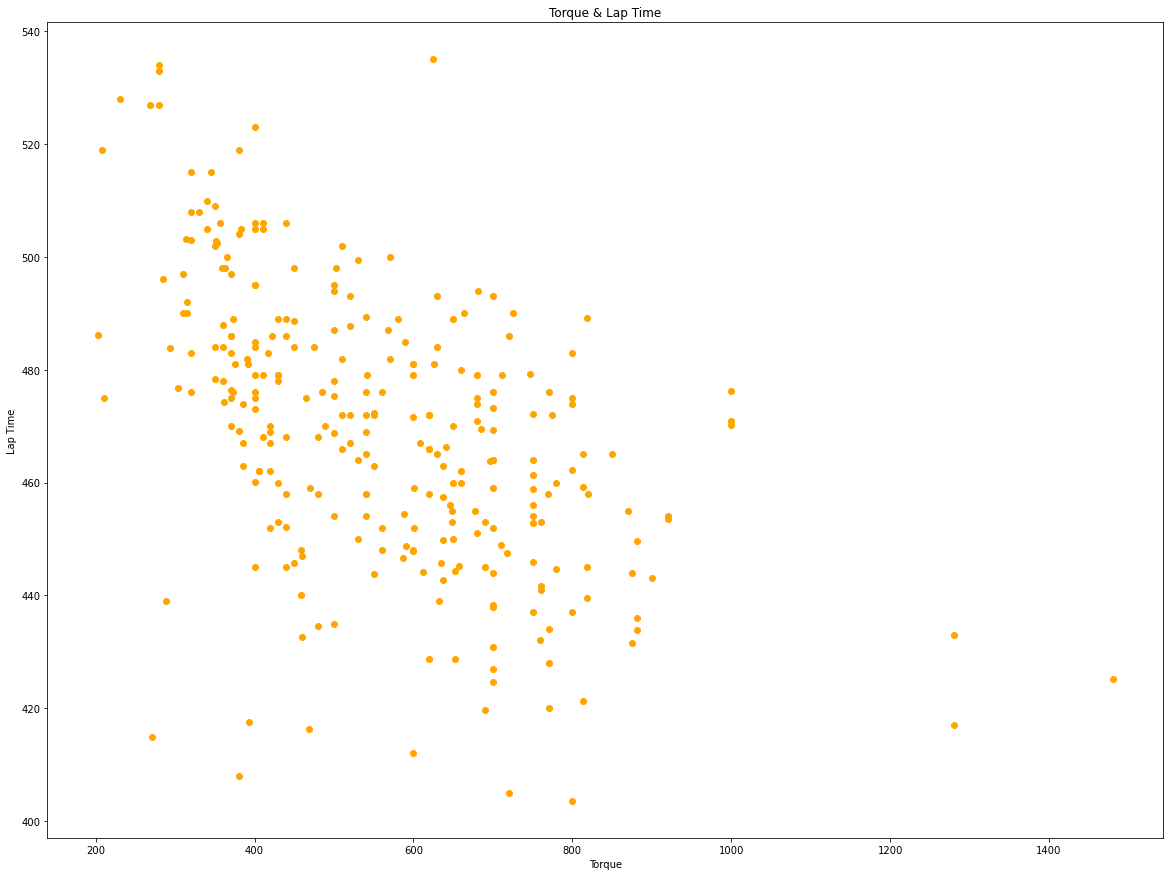

In [190]:
# 토크와 랩 타임의 관계
plt.figure(figsize = (20, 15))
plt.scatter(df['Torque'], df['laptime'], c = 'orange')
plt.title("Torque & Lap Time")
plt.xlabel("Torque")
plt.ylabel("Lap Time")
plt.show()

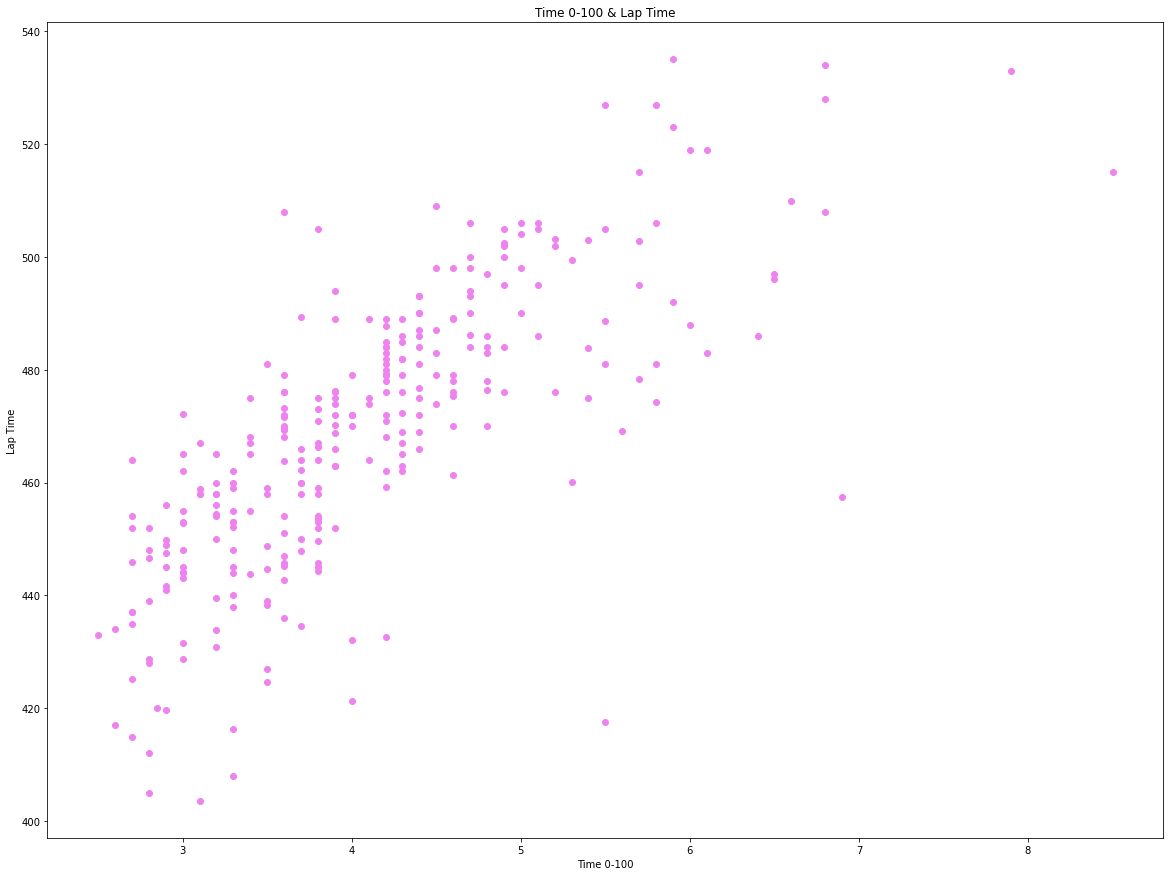

In [189]:
# 제로백과 랩 타임의 관계
plt.figure(figsize = (20, 15))
plt.scatter(df['Zero'], df['laptime'], c = 'violet')
plt.title("Time 0-100 & Lap Time")
plt.xlabel("Time 0-100")
plt.ylabel("Lap Time")
plt.show()

# 상관계수 행렬

In [149]:
np.round(df.corr(),2)

,CurbWeight,TopSpeed,Displacement,Power,Torque,laptime,Zero
CurbWeight,1.00,0.19,0.44,0.43,0.52,0.04,-0.11
TopSpeed,0.19,1.00,0.52,0.75,0.59,-0.66,-0.70
Displacement,0.44,0.52,1.00,0.63,0.58,-0.31,-0.36
Power,0.43,0.75,0.63,1.00,0.89,-0.67,-0.70
Torque,0.52,0.59,0.58,0.89,1.00,-0.53,-0.59
laptime,0.04,-0.66,-0.31,-0.67,-0.53,1.00,0.75
Zero,-0.11,-0.70,-0.36,-0.70,-0.59,0.75,1.00


In [150]:
import seaborn as sns

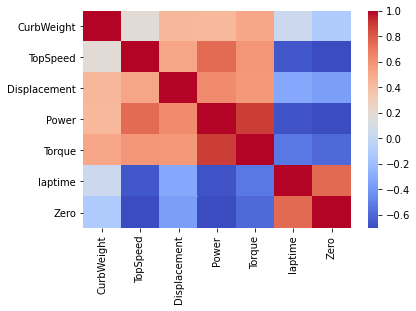

In [151]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

# 군집화

### k-means 군집화

In [152]:
from sklearn.cluster import KMeans

In [153]:
df

,CurbWeight,TopSpeed,Displacement,Power,Torque,vehicle,laptime,Price,Zero
0,1626,325.0,4.0,730,800,AMG GT Black Series,403.62,337800,3.1
1,1525,354.0,6.5,770,720,Lamborghini Aventador SVJ,404.97,432300,2.8
2,650,290.0,2.8,455,380,Radical SR8LM,408.00,NaN,3.3
3,1526,328.0,5.2,640,600,Lamborghini Huracán Performante,412.01,NaN,2.8
4,650,270.0,2.6,363,271,Radical SR8,415.00,NaN,2.7
...,...,...,...,...,...,...,...,...,...
283,1319,235.0,2.0,200,269,Honda Civic Type-R 2.0i LS,527.00,26400,5.5
284,1203,223.0,1.6,194,230,Opel Corsa OPC,528.00,NaN,6.8
285,1372,235.0,2.0,200,280,Volkswagen Golf GTI (Mk5),533.00,NaN,7.9
286,1293,230.0,1.6,207,280,Opel Corsa 1.6 Turbo OPC,534.00,NaN,6.8


In [154]:
X = df.drop(columns = 'vehicle')
X = X.drop(columns = 'laptime')
X = X.drop(columns = 'Price')
X

,CurbWeight,TopSpeed,Displacement,Power,Torque,Zero
0,1626,325.0,4.0,730,800,3.1
1,1525,354.0,6.5,770,720,2.8
2,650,290.0,2.8,455,380,3.3
3,1526,328.0,5.2,640,600,2.8
4,650,270.0,2.6,363,271,2.7
...,...,...,...,...,...,...
283,1319,235.0,2.0,200,269,5.5
284,1203,223.0,1.6,194,230,6.8
285,1372,235.0,2.0,200,280,7.9
286,1293,230.0,1.6,207,280,6.8


In [155]:
header_x = X.columns
header_x

Index(['CurbWeight', 'TopSpeed', 'Displacement', 'Power', 'Torque', 'Zero'], dtype='object')

In [172]:
Y = df.laptime
Y

0      3.1
1      2.8
2      3.3
3      2.8
4      2.7
      ... 
283    5.5
284    6.8
285    7.9
286    6.8
287    5.9
Name: laptime, Length: 288, dtype: float64

In [156]:
# 적정 군집 갯수 확인하기
def total_internal_ss(X, centers, clusters):
    dist_var = 0
    num_cluster = 0
    for i in centers: # 몇번째 군집의 중심점을 선택할지
        loc_data = 0
        for x in clusters: # 각 군집 내의 데이터들
            if x == num_cluster:
                dist_var += (i - X[loc_data])**2
            loc_data += 1
        num_cluster += 1
    return sum(dist_var)

In [157]:
a = list(list(X.loc[i]) for i in range(len(X.index)))
b = np.array(a)
b

array([[1.626e+03, 3.250e+02, 4.000e+00, 7.300e+02, 8.000e+02, 3.100e+00],
       [1.525e+03, 3.540e+02, 6.500e+00, 7.700e+02, 7.200e+02, 2.800e+00],
       [6.500e+02, 2.900e+02, 2.800e+00, 4.550e+02, 3.800e+02, 3.300e+00],
       ...,
       [1.372e+03, 2.350e+02, 2.000e+00, 2.000e+02, 2.800e+02, 7.900e+00],
       [1.293e+03, 2.300e+02, 1.600e+00, 2.070e+02, 2.800e+02, 6.800e+00],
       [2.589e+03, 2.250e+02, 5.000e+00, 5.170e+02, 6.250e+02, 5.900e+00]])

In [158]:
num_cluster = [2,3,4,5,6,7,8,9,10]
TIS_array = []
for i in num_cluster:
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(b)
    a = total_internal_ss(b, kmeans.cluster_centers_, kmeans.labels_)
    TIS_array.append(a)

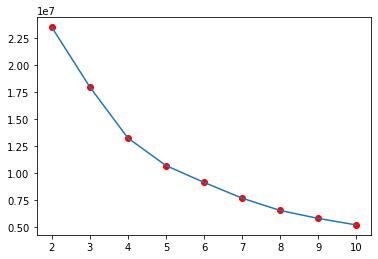

In [159]:
plt.scatter(num_cluster, TIS_array, color = 'red')
plt.plot(num_cluster, TIS_array)
plt.show()

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

In [176]:
X

,CurbWeight,TopSpeed,Displacement,Power,Torque,Zero
0,1626,325.0,4.0,730,800,3.1
1,1525,354.0,6.5,770,720,2.8
2,650,290.0,2.8,455,380,3.3
3,1526,328.0,5.2,640,600,2.8
4,650,270.0,2.6,363,271,2.7
...,...,...,...,...,...,...
283,1319,235.0,2.0,200,269,5.5
284,1203,223.0,1.6,194,230,6.8
285,1372,235.0,2.0,200,280,7.9
286,1293,230.0,1.6,207,280,6.8


In [191]:
kmeans = KMeans(n_clusters=4, random_state=123)         # kmeans object for 3 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X)                                           # Unsupervised learning => Only X.
res = pd.Series(kmeans.labels_)                         # Cluster labeling result as Series.

In [193]:
center = kmeans.cluster_centers_
center

array([[1390.9266055 ,  273.8440367 ,    3.07798165,  342.57798165,
         393.50458716,    4.81651376],
       [1954.97368421,  299.84210526,    4.93684211,  625.13157895,
         813.73684211,    3.74210526],
       [1585.19379845,  313.46511628,    4.79689922,  551.41860465,
         642.29457364,    3.64612403],
       [ 693.83333333,  255.        ,    2.40833333,  334.5       ,
         374.25      ,    3.70833333]])

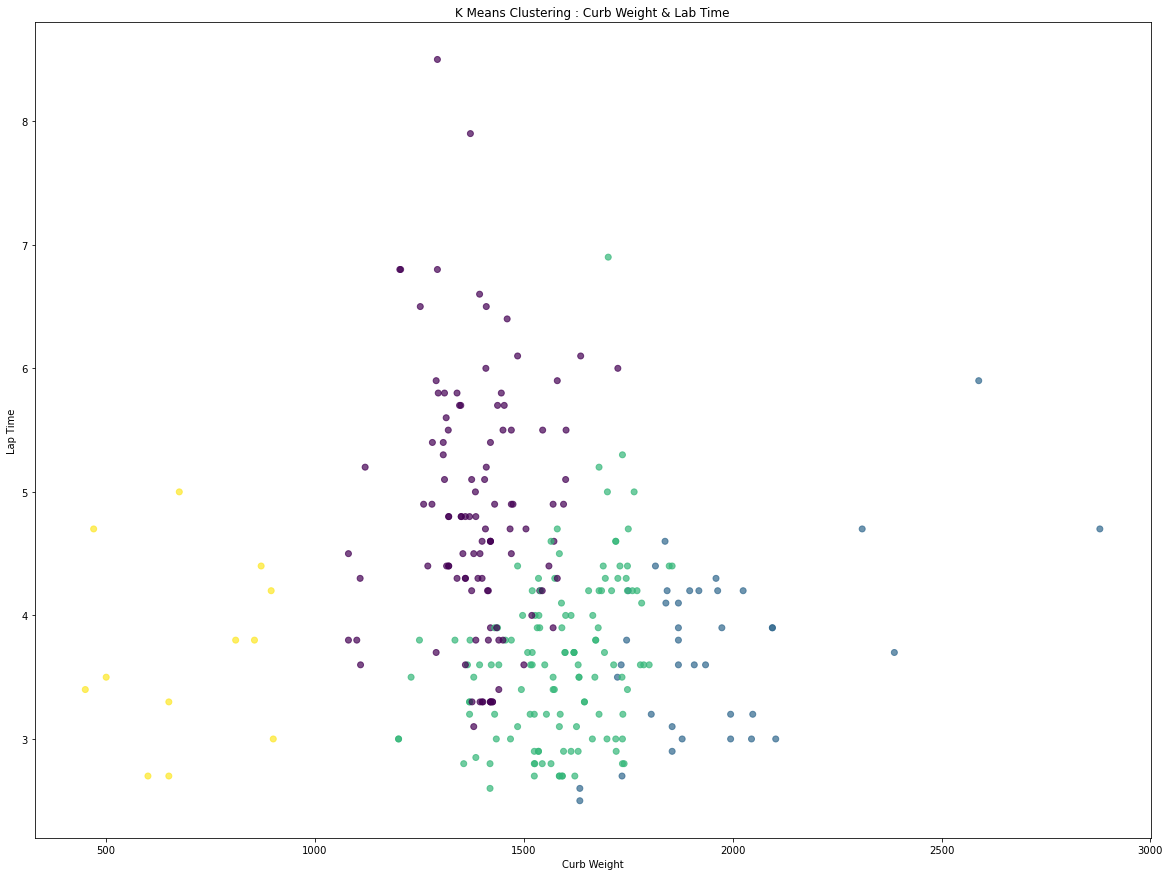

In [198]:
plt.figure(figsize = (20, 15))
plt.scatter(X.CurbWeight, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Curb Weight & Lab Time')
plt.xlabel("Curb Weight")
plt.ylabel("Lap Time")
plt.show()

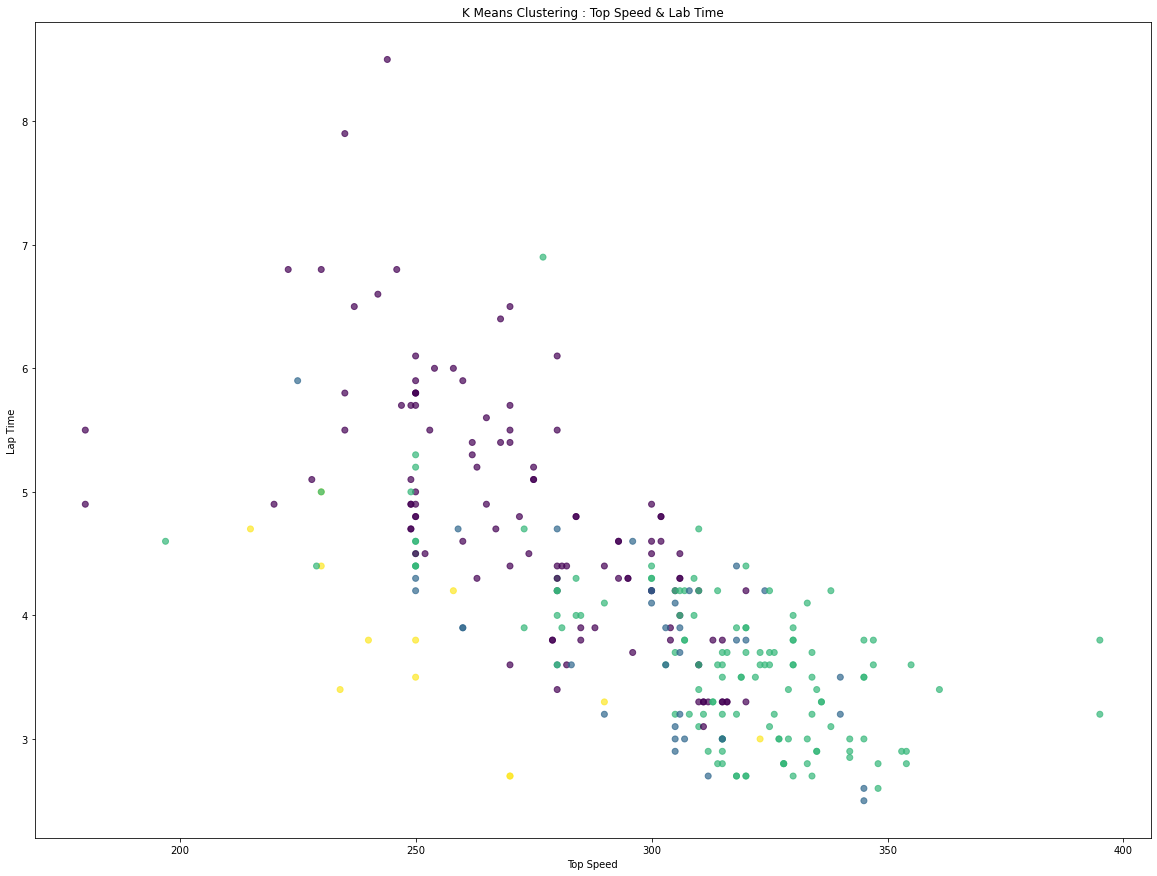

In [199]:
plt.figure(figsize = (20, 15))
plt.scatter(X.TopSpeed, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Top Speed & Lab Time')
plt.xlabel("Top Speed")
plt.ylabel("Lap Time")
plt.show()

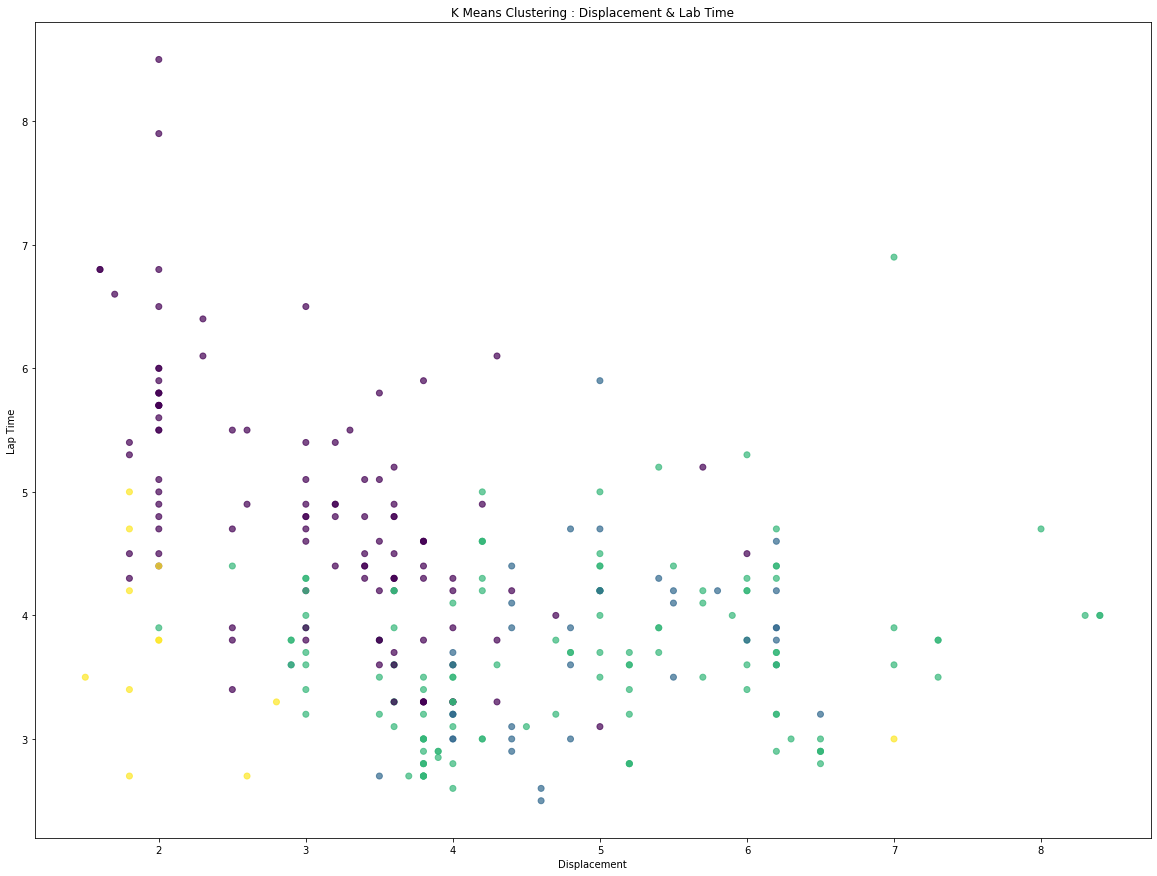

In [202]:
plt.figure(figsize = (20, 15))
plt.scatter(X.Displacement, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Displacement & Lab Time')
plt.xlabel("Displacement")
plt.ylabel("Lap Time")
plt.show()

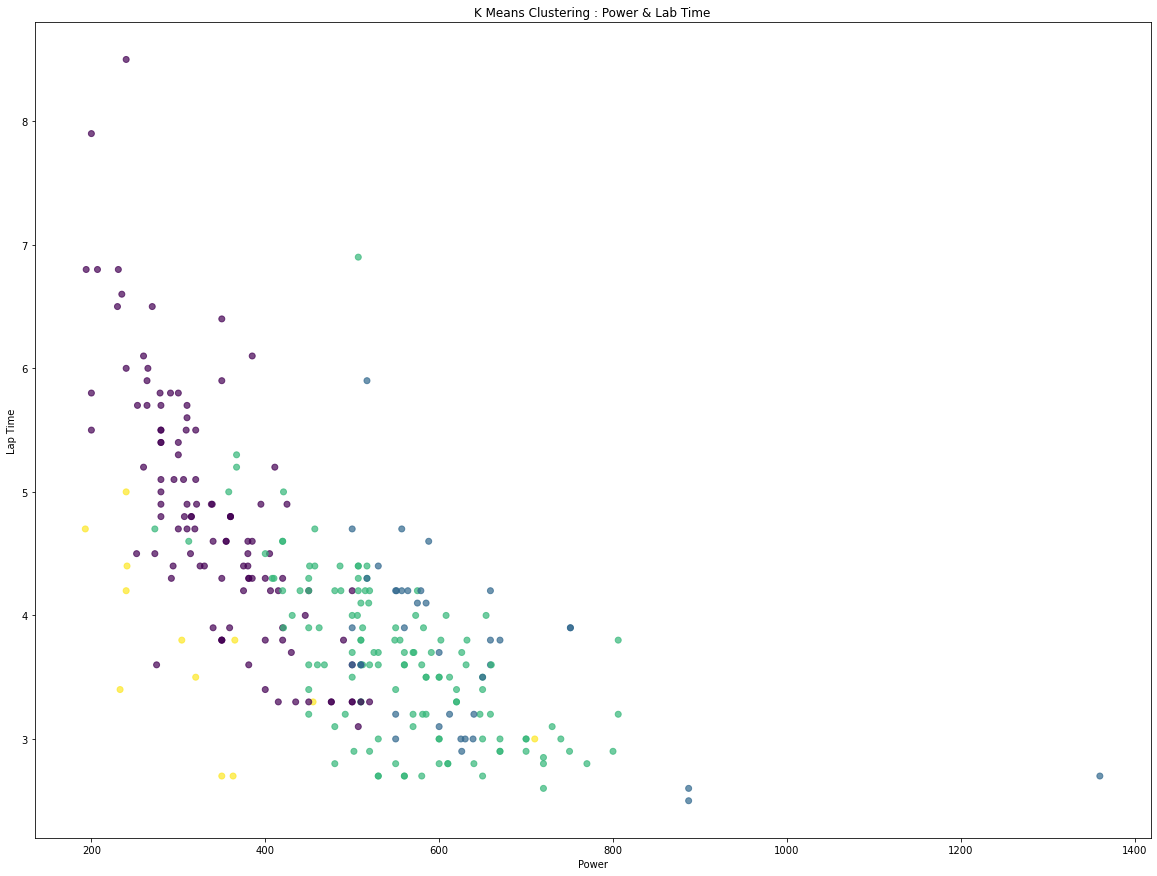

In [203]:
plt.figure(figsize = (20, 15))
plt.scatter(X.Power, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Power & Lab Time')
plt.xlabel("Power")
plt.ylabel("Lap Time")
plt.show()

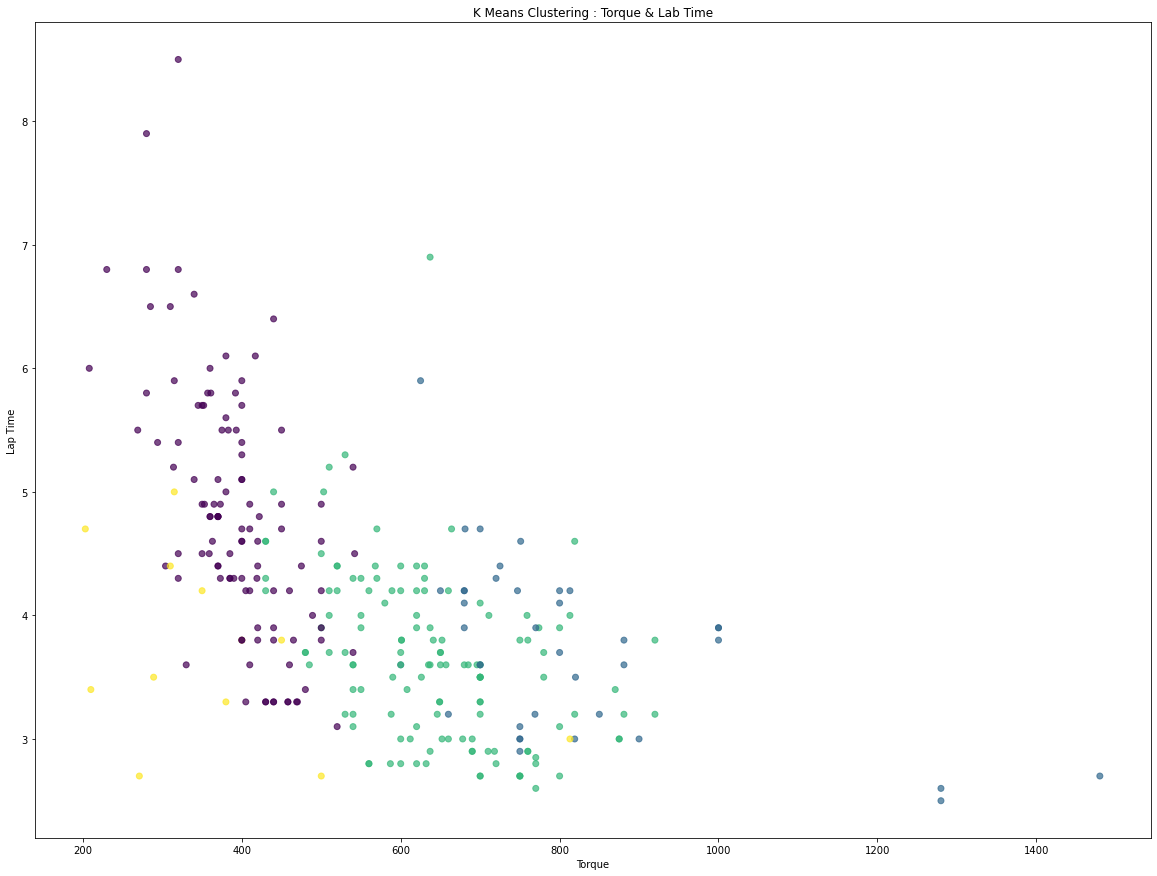

In [204]:
plt.figure(figsize = (20, 15))
plt.scatter(X.Torque, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Torque & Lab Time')
plt.xlabel("Torque")
plt.ylabel("Lap Time")
plt.show()

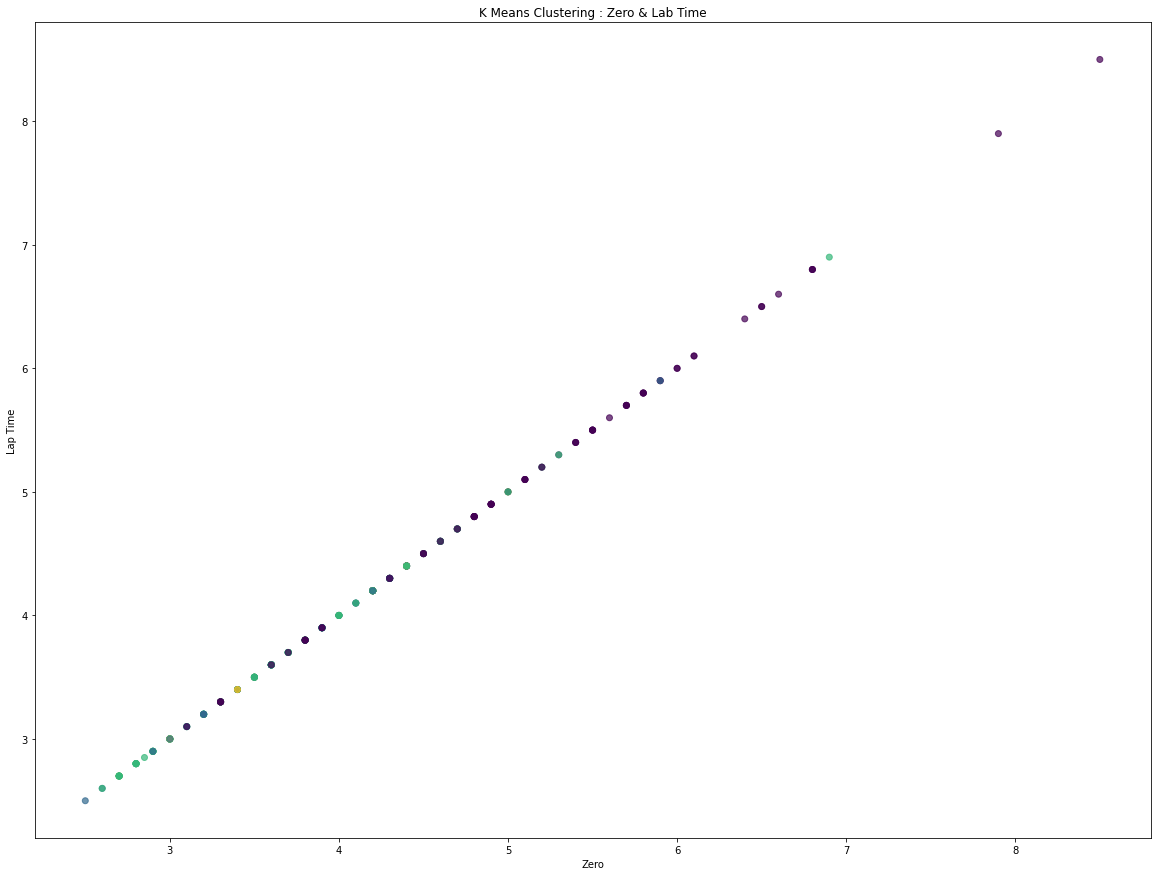

In [205]:
plt.figure(figsize = (20, 15))
plt.scatter(X.Zero, Y, c = pd.Series(kmeans.labels_), alpha=0.7 )
plt.title('K Means Clustering : Zero & Lab Time')
plt.xlabel("Zero")
plt.ylabel("Lap Time")
plt.show()

In [206]:
X.Zero

0      3.1
1      2.8
2      3.3
3      2.8
4      2.7
      ... 
283    5.5
284    6.8
285    7.9
286    6.8
287    5.9
Name: Zero, Length: 288, dtype: float64

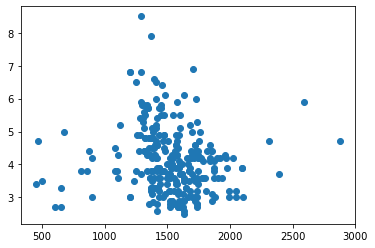

In [208]:
plt.scatter(X.C, Y)
plt.show()

# 선형회귀 수정

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import load_boston
%matplotlib inline

In [161]:
Y_data = df["laptime"].values
Y_data = (Y_data-Y_data.mean())*100
X_data = df[["CurbWeight","Displacement","TopSpeed", "Power","Torque", "Zero"]].values
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=1234)

In [162]:
X_data

array([[1.626e+03, 4.000e+00, 3.250e+02, 7.300e+02, 8.000e+02, 3.100e+00],
       [1.525e+03, 6.500e+00, 3.540e+02, 7.700e+02, 7.200e+02, 2.800e+00],
       [6.500e+02, 2.800e+00, 2.900e+02, 4.550e+02, 3.800e+02, 3.300e+00],
       ...,
       [1.372e+03, 2.000e+00, 2.350e+02, 2.000e+02, 2.800e+02, 7.900e+00],
       [1.293e+03, 1.600e+00, 2.300e+02, 2.070e+02, 2.800e+02, 6.800e+00],
       [2.589e+03, 5.000e+00, 2.250e+02, 5.170e+02, 6.250e+02, 5.900e+00]])

In [163]:
header = ["CurbWeight","Displacement","TopSpeed", "Power","Torque", "laptime", "Zero"]

In [164]:
Y_data = Y_data.reshape(-1, 1)
Y_data

array([[-6552.11458333],
       [-6417.11458333],
       [-6114.11458333],
       [-5713.11458333],
       [-5414.11458333],
       [-5274.11458333],
       [-5214.11458333],
       [-5164.11458333],
       [-4941.11458333],
       [-4911.11458333],
       [-4784.11458333],
       [-4451.11458333],
       [-4402.11458333],
       [-4214.11458333],
       [-4114.11458333],
       [-4046.11458333],
       [-4032.11458333],
       [-3822.11458333],
       [-3757.11458333],
       [-3701.11458333],
       [-3644.11458333],
       [-3614.11458333],
       [-3524.11458333],
       [-3514.11458333],
       [-3450.11458333],
       [-3425.11458333],
       [-3310.11458333],
       [-3214.11458333],
       [-3203.11458333],
       [-3114.11458333],
       [-3078.11458333],
       [-3014.11458333],
       [-3004.11458333],
       [-2951.11458333],
       [-2914.11458333],
       [-2814.11458333],
       [-2751.11458333],
       [-2646.11458333],
       [-2613.11458333],
       [-2537.11458333],


In [165]:
df = pd.DataFrame(np.append(X_data, Y_data, axis = 1))
df.columns = header

In [166]:
df

,CurbWeight,Displacement,TopSpeed,Power,Torque,laptime,Zero
0,1626.0,4.0,325.0,730.0,800.0,3.1,-6552.114583
1,1525.0,6.5,354.0,770.0,720.0,2.8,-6417.114583
2,650.0,2.8,290.0,455.0,380.0,3.3,-6114.114583
3,1526.0,5.2,328.0,640.0,600.0,2.8,-5713.114583
4,650.0,2.6,270.0,363.0,271.0,2.7,-5414.114583
...,...,...,...,...,...,...,...
283,1319.0,2.0,235.0,200.0,269.0,5.5,5785.885417
284,1203.0,1.6,223.0,194.0,230.0,6.8,5885.885417
285,1372.0,2.0,235.0,200.0,280.0,7.9,6385.885417
286,1293.0,1.6,230.0,207.0,280.0,6.8,6485.885417


In [167]:
myModel1 = smf.ols(formula = "laptime ~ CurbWeight + Displacement + TopSpeed + Displacement + Torque + Zero", data=df)
result1 = myModel1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                laptime   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     108.8
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.04e-63
Time:                        23:55:15   Log-Likelihood:                -252.18
No. Observations:                 288   AIC:                             516.4
Df Residuals:                     282   BIC:                             538.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.9902      0.414     16.901      0.000       6.176       7.804
CurbWeight    3.441e-05      0.000      0.217      0.828      -0.000       0.000
Displacement     0.0337      0.031      1.081      0.281      -0.028       0.095
TopSpeed        -0.0085      0.001     -5.749      0.000      -0.011      -0.006
Torque          -0.0010      0.000     -3.454      0.001      -0.002      -0.000
Zero             0.0002   2.08e-05      8.975      0.000       0.000       0.000
==============================================================================
Omnibus:                       86.953   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.756
Skew:                           1.266   Prob(JB):                     1.48e-67
Kurtosis:                       7.386   Cond. No.                     2.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
# Displacement의 유의확률 P가 유의수준 0.05를 초과하나, 해당 계수를 제외할지는 추후 결정
myModel2 = smf.ols(formula = "laptime ~ Displacement + TopSpeed + Displacement + Torque + Zero", data=df)
result2 = myModel2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                laptime   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     110.4
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.45e-56
Time:                        22:56:39   Log-Likelihood:                -2524.4
No. Observations:                 288   AIC:                             5059.
Df Residuals:                     283   BIC:                             5077.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5681.1889   1088.944      5.217      0.000    3537.731    7824.647
Displacement   134.2745     80.929      1.659      0.098     -25.025     293.574
TopSpeed       -18.7069      4.016     -4.659      0.000     -26.611     -10.803
Torque          -1.2917      0.693     -1.863      0.064      -2.657       0.073
Zero            13.4279      1.371      9.792      0.000      10.729      16.127
==============================================================================
Omnibus:                       59.228   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.047
Skew:                          -1.044   Prob(JB):                     5.19e-27
Kurtosis:                       5.392   Cond. No.                     7.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
myDict = {"변수":[], "VIF":[]}
for i, feature in enumerate(myModel2.exog_names):
    if feature != "Intercept":
        myDict["변수"] += [feature]
        myDict["VIF"] += [variance_inflation_factor(myModel2.exog, i)]
pd.DataFrame(myDict)

,변수,VIF
0,Displacement,1.650850
1,TopSpeed,2.389504
2,Torque,2.026246
3,Zero,2.187867


### Statsmodel 결과 반영하여 재군집화

In [127]:
# 우선 CurbWeight만 제거해본다
X_new = X.drop(columns = 'CurbWeight')
X_new

,TopSpeed,Displacement,Power,Torque,Zero
0,325.0,4.0,730,800,3.1
1,354.0,6.5,770,720,2.8
2,290.0,2.8,455,380,3.3
3,328.0,5.2,640,600,2.8
4,270.0,2.6,363,271,2.7
...,...,...,...,...,...
283,235.0,2.0,200,269,5.5
284,223.0,1.6,194,230,6.8
285,235.0,2.0,200,280,7.9
286,230.0,1.6,207,280,6.8


In [128]:
header_x_new = X_new.columns
header_x_new

Index(['TopSpeed', 'Displacement', 'Power', 'Torque', 'Zero'], dtype='object')

In [129]:
a = list(list(X_new.loc[i]) for i in range(len(X_new.index)))
b = np.array(a)
b

array([[325. ,   4. , 730. , 800. ,   3.1],
       [354. ,   6.5, 770. , 720. ,   2.8],
       [290. ,   2.8, 455. , 380. ,   3.3],
       ...,
       [235. ,   2. , 200. , 280. ,   7.9],
       [230. ,   1.6, 207. , 280. ,   6.8],
       [225. ,   5. , 517. , 625. ,   5.9]])

In [130]:
num_cluster = [2,3,4,5,6,7,8,9,10]
TIS_array = []
for i in num_cluster:
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(b)
    a = total_internal_ss(b, kmeans.cluster_centers_, kmeans.labels_)
    TIS_array.append(a)

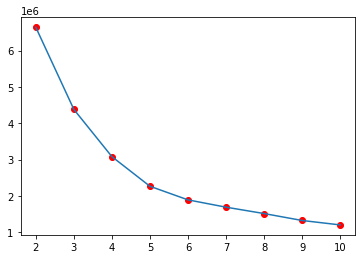

In [131]:
plt.scatter(num_cluster, TIS_array, color = 'red')
plt.plot(num_cluster, TIS_array)
plt.show()

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

In [169]:
# Dataset #1.
#X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)

plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

NameError: name 'X1' is not defined

### 군집 시각화

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

In [ ]:
# 군집의 갯수는 5개로 지정

In [ ]:
# Dataset #1.
#X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)

plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

### Displacement도 제거

In [132]:
# 우선 CurbWeight만 제거해본다
X_new2 = X.drop(columns = 'Displacement')
X_new2

,CurbWeight,TopSpeed,Power,Torque,Zero
0,1626,325.0,730,800,3.1
1,1525,354.0,770,720,2.8
2,650,290.0,455,380,3.3
3,1526,328.0,640,600,2.8
4,650,270.0,363,271,2.7
...,...,...,...,...,...
283,1319,235.0,200,269,5.5
284,1203,223.0,194,230,6.8
285,1372,235.0,200,280,7.9
286,1293,230.0,207,280,6.8


In [134]:
header_x_new2 = X_new2.columns
header_x_new2

Index(['CurbWeight', 'TopSpeed', 'Power', 'Torque', 'Zero'], dtype='object')

In [135]:
a = list(list(X_new.loc[i]) for i in range(len(X_new.index)))
b = np.array(a)
b

array([[325. ,   4. , 730. , 800. ,   3.1],
       [354. ,   6.5, 770. , 720. ,   2.8],
       [290. ,   2.8, 455. , 380. ,   3.3],
       ...,
       [235. ,   2. , 200. , 280. ,   7.9],
       [230. ,   1.6, 207. , 280. ,   6.8],
       [225. ,   5. , 517. , 625. ,   5.9]])

In [136]:
num_cluster = [2,3,4,5,6,7,8,9,10]
TIS_array = []
for i in num_cluster:
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans.fit(b)
    a = total_internal_ss(b, kmeans.cluster_centers_, kmeans.labels_)
    TIS_array.append(a)

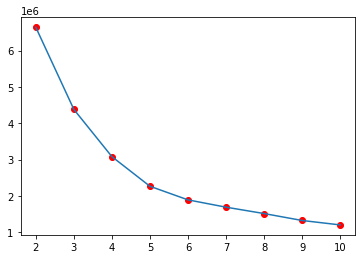

In [137]:
plt.scatter(num_cluster, TIS_array, color = 'red')
plt.plot(num_cluster, TIS_array)
plt.show()